In [1]:
import numpy as np 
import sympy as sym 
from scipy.optimize import newton
import matplotlib.pyplot as plt

Raíces de polinomios 
Ejercicio 5 

In [2]:
x = sym.Symbol('x', real=True)
n = 20 

def rodrigues_laguerre(n):
    func = sym.exp(-x) * x**n
    dfunc = sym.diff(func, x, n)
    return sym.exp(x) / sym.factorial(n) * dfunc

Laguerre = []
DLaguerre = []

for i in range(n+1):
    Poly = rodrigues_laguerre(i)
    Laguerre.append(Poly)
    DLaguerre.append(sym.diff(Poly, x, 1))

def GetAllRoots(n, Laguerre, DLaguerre):
    poly = sym.lambdify([x], Laguerre[n], 'numpy')
    Dpoly = sym.lambdify([x], DLaguerre[n], 'numpy')
    xn = np.linspace(0, 1000, 10000) 
    Roots = []
    for i in range(len(xn) - 1):
        x0, x1 = xn[i], xn[i + 1]
        if poly(x0) * poly(x1) < 0: 
                root = newton(poly, (x0 + x1) / 2, fprime=Dpoly, tol=1e-10, maxiter=1000)
                Roots.append(root)
           
    return Roots

Roots = GetAllRoots(n, Laguerre, DLaguerre)
Roots

[0.07053988969198875,
 0.37212681800161135,
 0.916582102483275,
 1.707306531028313,
 2.7491992553120155,
 4.048925313859971,
 5.6151749709647225,
 7.45901745353833,
 9.594392872869545,
 12.038802546079614,
 14.81429345975624,
 17.94889550060077,
 21.478788256640424,
 25.45170284297728,
 29.932554644200415,
 35.01343424829329,
 40.833057052127145,
 47.61999404773615,
 55.810795748348085,
 66.52441652573013]

In [ ]:
Ejercicios de integración 

Ejercicio 17

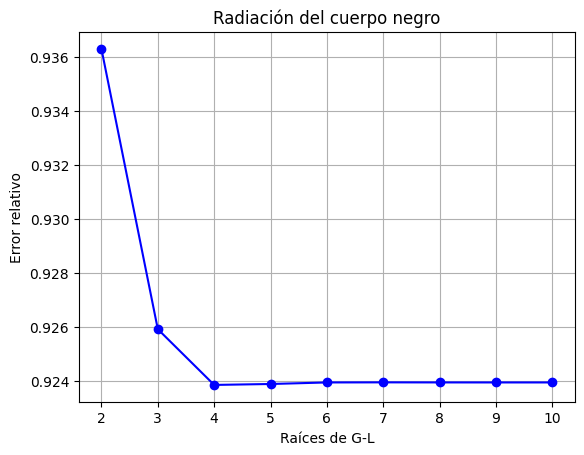

In [3]:
def integrate(x):
    return x**3 / (np.exp(x) - 1)

exact_integral = np.pi**4 / 15
n_values = np.arange(2, 11)

estimated_integrals = []
relative_errors = []

for i in n_values:
    Roots, Weights = np.polynomial.laguerre.laggauss(i)
    estimated_integral = np.sum(Weights * integrate(Roots))

    relative_error = abs(estimated_integral - exact_integral) / exact_integral

    estimated_integrals.append(estimated_integral)
    relative_errors.append(relative_error)

plt.plot(n_values, relative_errors, marker='o', color='b')
plt.xlabel('Raíces de G-L')
plt.ylabel('Error relativo')
plt.title('Radiación del cuerpo negro')
plt.grid(True)
plt.show()

Ejercicio 7 

In [5]:
import numpy as np

n = 100

x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)

A = ((x[1] - x[0])**2)


def sphere(x,y):
    if -x**2-y**2 <-1:
        return 0
    else:
        return np.sqrt(1-(y**2)-(x**2))

volumen = 0

for i in range(n - 1):
    for j in range(n - 1):
        volumen += sphere(x[i], y[j]) * A
volumen

2.0937084501081826

Ejercicio 19 

In [6]:
N0V = 0.3  
TD = 300.0  
dT = 1e-4  
n = 50 

def calc_int(f):
    a = -1 
    b = 1
    Roots, Weights = np.polynomial.legendre.leggauss(n)
    t = 0.5 * ((b - a) * Roots + a + b)
    integral = np.sum(Weights * f(t)) / 2
    return integral


def funcion_a_integrar(x, DT, M):
    return np.tanh(TD * np.sqrt(x**2 + (DT**2)) / (2 * M)) / (np.sqrt(x**2 + (DT**2)))


M = np.linspace(1, 20, 10000)
DT = (M[0] - M[1]) * TD * 1.05e-34
Tc = 0
for i in range(1, 10000):
    integral = calc_int(lambda x: funcion_a_integrar(x, DT, M[i]))
    if np.abs(integral - (1 / N0V)) < dT:
        Tc = M[i]
        break 

Tc

12.135113511351136